# python warm-up for statistics and machine learning in life sciences

The goal of this notebook is to provide a warm-up before the course, as well as provide a gentle yet functionnal intro to some of the libraries we will be using during the course.


* [01. Basic python](#basic)
* [02. numpy and vectorized operations](#numpy)
* [03. basic plotting](#plot)
* [04. generating random numbers](#random)
* [05. statistical testing](#stats)
* [06. bringing together numpy, numpy.random, and matplotlib](#together)
* [07. the briefest intro to pandas](#pandas)


## 00. Installation

This course requires you to install a number of external libraries.

If you have installed python via anaconda, then you should already have most of them installed.


Try the code below to check that :

In [1]:
%pip install numpy seaborn pandas scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [2]:
import numpy
print('numpy ok')
import seaborn
print('seaborn ok')
import pandas
print('pandas ok')
import sklearn
print('sklearn ok')

numpy ok
seaborn ok
pandas ok
sklearn ok


If one of these failed, identify which one and follow the corresponding installation instructions for :

* numpy : in a terminal (Mac/Linux) or the anaconda prompt (Windows) write `conda install numpy` and follow instruction
* seaborn : same as numpy, but the command is : `conda install seaborn`
* pandas : same as numpy, but the command is : `conda install pandas`
* [sklearn](https://scikit-learn.org/stable/install.html)

After an installation re-launch the code above until you have no errors

> Note : you may have to restart the notebook kernel (Kernel>Restart) for the new libraries to be available


> Note 2 : alternatively and if you prefer, you can do the installations with `pip`


## 01. basic python <a class="anchor" id="basic"></a>


In [6]:

X = []

for i in range(1,11):
    X.append( i**2 ) # squared

print(X)

[1, 4, 9, 16, 25, 36, 49, 64, 81, 100]


In [7]:

for x in X:
    print(x)


1
4
9
16
25
36
49
64
81
100


In [8]:
for x in X:
    if x%2 == 1:
        print(x,'is odd')
    else:
        print(x,'is even')

1 is odd
4 is even
9 is odd
16 is even
25 is odd
36 is even
49 is odd
64 is even
81 is odd
100 is even


In [12]:
# list comprehension is a very fine way of compressing all this

X = [ i**2 for i in range(1,11) ]

Xeven = [ x for x in X if x%2 == 0 ]
Xodd = [ x for x in X if x%2 == 1 ]


print( 'X    ', X )
print( 'Xeven', Xeven )
print( 'Xodd ', Xodd )

X     [1, 4, 9, 16, 25, 36, 49, 64, 81, 100]
Xeven [4, 16, 36, 64, 100]
Xodd  [1, 9, 25, 49, 81]


## 02. numpy and vectorized operations <a class="anchor" id="numpy"></a>

In [13]:
import numpy as np

# an array can be created from a list
X_array = np.array(X)

print(X_array)

[  1   4   9  16  25  36  49  64  81 100]


In [14]:
# you can perform operations on an array : 
print( X_array / 2 )  # divides each element by 2

[ 0.5  2.   4.5  8.  12.5 18.  24.5 32.  40.5 50. ]


In [18]:
print( np.exp(X_array ) ) # exponential
print( np.log(X_array ) ) # logarithm

[2.71828183e+00 5.45981500e+01 8.10308393e+03 8.88611052e+06
 7.20048993e+10 4.31123155e+15 1.90734657e+21 6.23514908e+27
 1.50609731e+35 2.68811714e+43]
[0.         1.38629436 2.19722458 2.77258872 3.21887582 3.58351894
 3.8918203  4.15888308 4.39444915 4.60517019]


In [19]:
print( 'shape' , X_array.shape ) # diemnsions of the array
print( 'mean ' , np.mean(X_array) ) # mean of the array
print( 'standard deviation' , np.std(X_array) ) # standard deviation of the array

shape (10,)
mean  38.5
standard deviation 32.41990129534635


### linspace and arange

These function extend `range` :
 * `np.linspace` : create an array comtaining an evenly spaced number of points between $a$ and $b$
 * `np.arange` : create an array with numbers going from $a$ to $b$ with a given increment

In [20]:
print( 'linspace 0,2,9 :' , np.linspace(0,2,9) , sep='\t' )
print( 'linspace -0.5,0.5,11 :' , np.linspace(-0.5,0.5,11) , sep='\t' )
print( 'linspace 10,0,11 :' , np.linspace(10,0,11) , sep='\t' )

linspace 0,2,9 :	[0.   0.25 0.5  0.75 1.   1.25 1.5  1.75 2.  ]
linspace -0.5,0.5,11 :	[-0.5 -0.4 -0.3 -0.2 -0.1  0.   0.1  0.2  0.3  0.4  0.5]
linspace 10,0,11 :	[10.  9.  8.  7.  6.  5.  4.  3.  2.  1.  0.]


In [21]:
print( "arange 0,2,0.1 :", np.arange(1.5,2,0.1) , sep='\t' )
print( "arange -1,1,0.125 :", np.arange(-1,1,0.125) , sep='\t' )
print( "arange 10,2 :", np.arange(10,2,1) , sep='\t' ) # reverse does not work!

arange 0,2,0.1 :	[1.5 1.6 1.7 1.8 1.9]
arange -1,1,0.125 :	[-1.    -0.875 -0.75  -0.625 -0.5   -0.375 -0.25  -0.125  0.     0.125
  0.25   0.375  0.5    0.625  0.75   0.875]
arange 10,2 :	[]


## 03. basic plotting <a class="anchor" id="plot"></a>

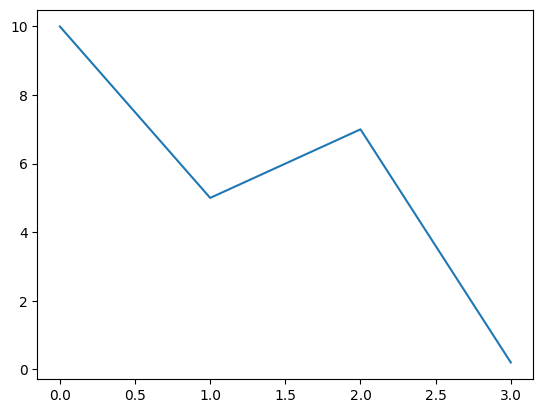

In [22]:
import matplotlib.pyplot as plt

plt.plot( [0,1,2,3] , [10,5,7,0.2] )
plt.show()

**Adding color, symbols, ...**

`matplotlib` offers many options to customize the appearance of your plot.

Here are the (some) common arguments to `plot()` (which can also be applied to many other graphical representations):
 * `color` : could be given as a (red,green,blue) tuple, a [name](https://matplotlib.org/3.1.0/gallery/color/named_colors.html), a hex code, ...  (see [here](https://matplotlib.org/tutorials/colors/colors.html) for all the options)
 * `marker` : symbols for the data point. `'.'` is a point, `'v'` a down triangle, ... see [here](https://matplotlib.org/3.3.3/api/markers_api.html#module-matplotlib.markers) for the list of possibilities.
 * `linestyle` : style of the line. `'-'` is solid, `'--'` is dashed, `''` for no line. See [here](https://matplotlib.org/3.3.3/gallery/lines_bars_and_markers/linestyles.html) for more options
 * `linewidth` : width of the lines
 * `markersize` : size of the markers

You are invited to experiment and explore these options. Here are a few examples:


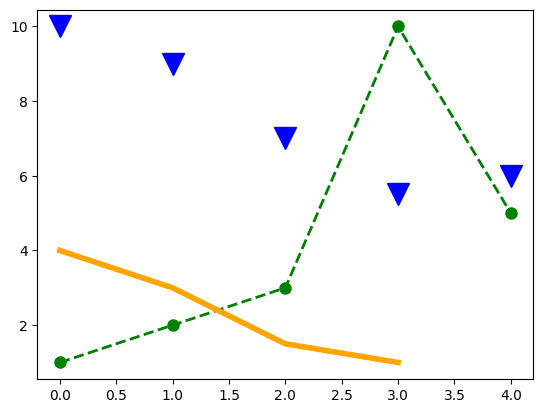

In [23]:
y1 = [1,2,3,10,5]
y2 = [10,9,7,5.5,6]
y3 = [4,3,1.5,1]

# green, dashed line, with circle markers
plt.plot( y1, color = 'green', marker = 'o', linestyle = '--', linewidth = 2, markersize = 8 )

# blue triangle with no line
plt.plot( y2, color = 'blue', marker = 'v', linestyle = '' , markersize = 16 )

# solid orange line
plt.plot(y3, color = 'orange', marker = '', linestyle = '-', linewidth = 4 )

plt.show()

Note that:
 * you can call plot several time in a row to make several lines appear (only `plt.show()` causes the figure to appear)
 * the frame of the picture automatically adjust to what it needs to show

**multiple subplots**

Now would normally be when we show you how to add labels, titles and legends to figures. 

However, the way `matplotlib` is built, it is actually a bit more efficient to first learn how to create multiple subplots.


Creating multiple plots is possible with the function `plt.subplots()`.
Amon its many arguments, it takes:
 * `nrows` : number of subplot rows
 * `ncols` : number of subplot columns
 * `figsize` : tuple (width,height) of the figure

This function creates a Figure and an Axes object.
The Axes object can be either : 
 * a simple Axe is there is 1 row and 1 columns
 * a list of Axe objects if there is 1 row and multiple columns, or 1 column and multiple rows
 * a list of lists of Axes objects if there is multiple rows and multiple columns


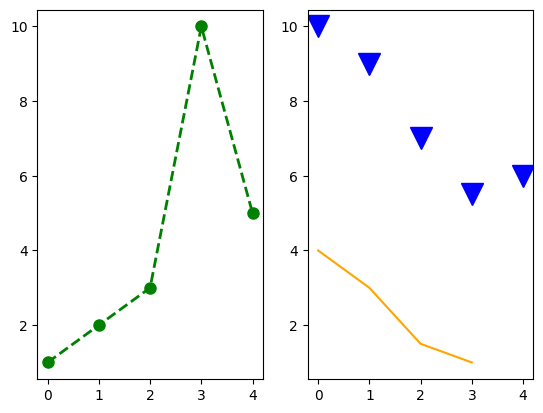

In [24]:
y1 = [1,2,3,10,5]
y2 = [10,9,7,5.5,6]
y3 = [4,3,1.5,1]
import matplotlib.pyplot as plt

# subplots returns a Figure and an Axes object
fig, ax = plt.subplots(nrows=1, ncols=2) # 2 columns and 1 row

# ax is a list with two objects. Each object correspond to 1 subplot

# accessing to the first column ax[0]
ax[0].plot( y1, color = 'green', marker = 'o', linestyle = '--', linewidth = 2, markersize = 8 )

# accessing to the second column ax[1]
ax[1].plot( y2, color = 'blue', marker = 'v', linestyle = '' , markersize = 16 )
ax[1].plot( y3, color = 'orange', marker = '', linestyle = '-' )

plt.show()

Notice how we call `ax[0].plot(...)` instead of `plt.plot(...)` to specify in which subplots we want to plot.

**multiple subplots - continued**

Let's see the same thing with several lines and several columns

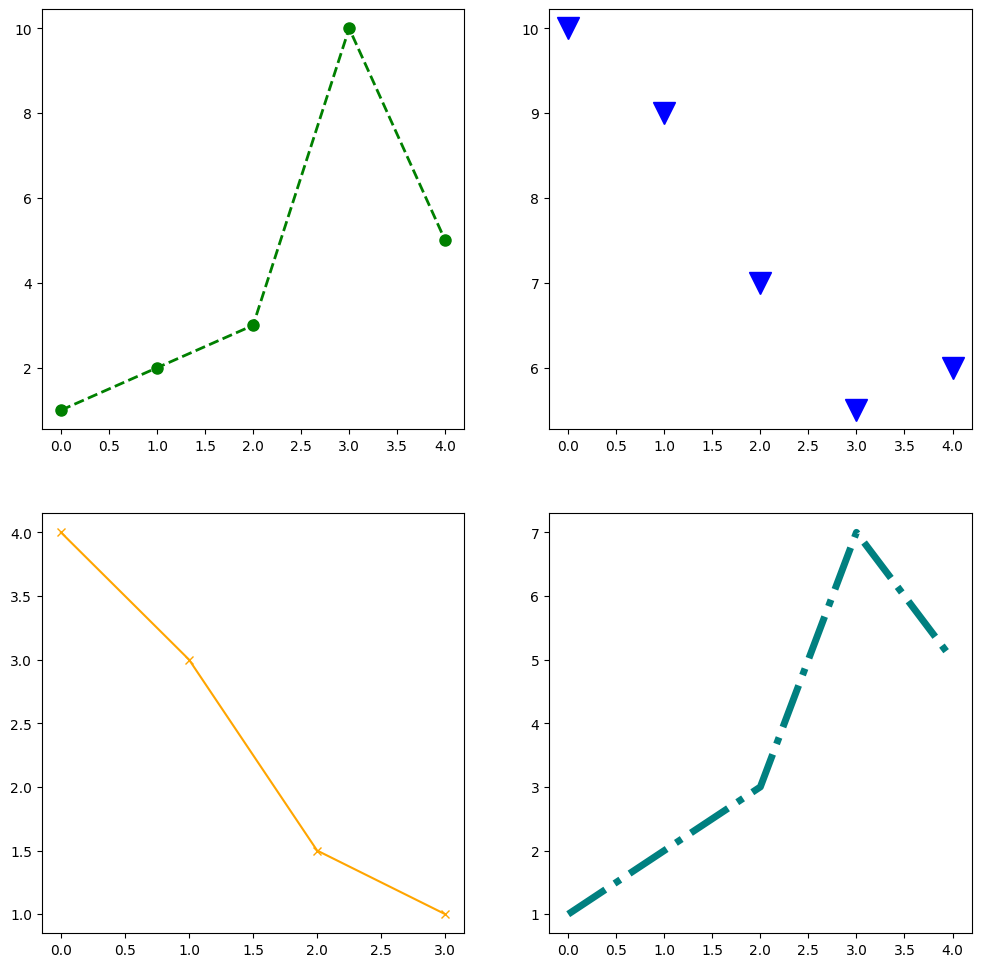

In [25]:
y1 = [1,2,3,10,5]
y2 = [10,9,7,5.5,6]
y3 = [4,3,1.5,1]
y4 = [1,2,3,7,5]

# 2 columns and 2 rows, and we also set the figure size
fig, ax = plt.subplots(nrows=2, ncols=2 , figsize = (12,12))

# ax is a list of two lists with two objects each.

# accessing to the first row, first column : ax[0][0]
ax[0][0].plot( y1, color = 'green', marker = 'o', linestyle = '--', linewidth = 2, markersize = 8 )

# accessing to the first row, second column : ax[0][1]
ax[0][1].plot( y2, color = 'blue', marker = 'v', linestyle = '' , markersize = 16 )

# accessing to the second row, first column : ax[1][0]
ax[1][0].plot( y3, color = 'orange', marker = 'x', linestyle = '-' )

# accessing to the first row, second column : ax[1][1]
ax[1][1].plot( y4, color = 'teal', linestyle = '-.' , linewidth=5 )

plt.show()

**setting up labels**

To set the labels at the x-axis, y-axis and title, we use the method of the Axe object:
 * `.set_xlabel(...)`
 * `.set_ylabel(...)`
 * `.set_title(...) `


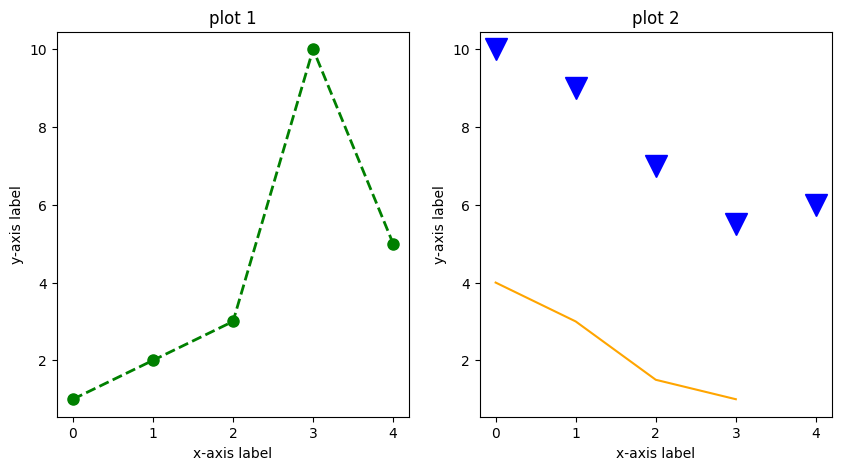

In [26]:
y1 = [1,2,3,10,5]
y2 = [10,9,7,5.5,6]
y3 = [4,3,1.5,1]

# subplots returns a Figure and an Axes object
fig, ax = plt.subplots(nrows=1, ncols=2 , figsize=(10,5)) # 2 columns and 1 row


# accessing to the first column ax[0]
ax[0].plot( y1, color = 'green', marker = 'o', linestyle = '--', linewidth = 2, markersize = 8 )
ax[0].set_xlabel('x-axis label')
ax[0].set_ylabel('y-axis label')
ax[0].set_title('plot 1')


# accessing to the second column ax[1]
ax[1].plot( y2, color = 'blue', marker = 'v', linestyle = '' , markersize = 16 )
ax[1].plot( y3, color = 'orange', marker = '', linestyle = '-' )
ax[1].set_xlabel('x-axis label')
ax[1].set_ylabel('y-axis label')
ax[1].set_title('plot 2')

plt.show()

**setting up a legend** 

Each element we add to the figure using `plot()` can be given a label using the `label` argument.
Then, a legend may be added to the figure using the `legend()` method.

This `legend()` method can take a `loc` argument that specifies where it should be plotted. 
Possible values for this argument are: `'best' , 'upper right' , 'upper left' , 'lower left' , 'lower right' , 'right' , 'center left' , 'center right' , 'lower center' , 'upper center' , 'center'` (the default is `best`).


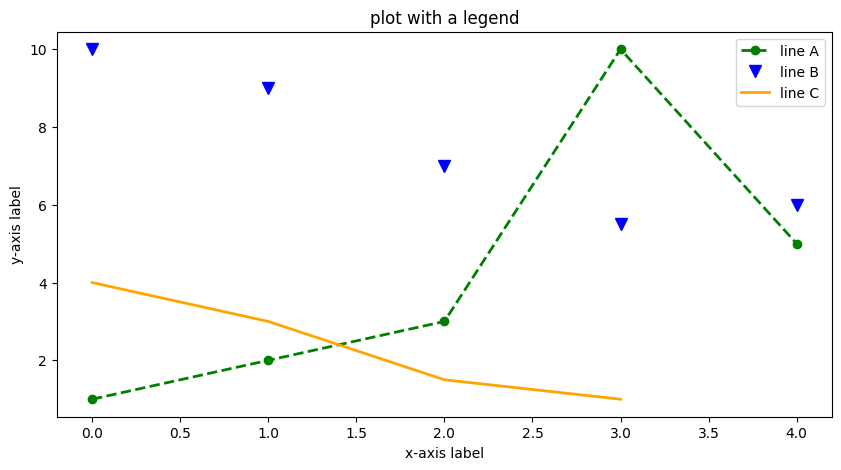

In [27]:

fig, ax = plt.subplots(nrows=1, ncols=1 , figsize=(10,5)) # 2 columns and 1 row

# NB : with 1 col and 1 row, ax is directly the sole subplot we have
#      so to call it we just use ax.plot , ax.set_xlabel , ...

ax.plot( y1, color = 'green', marker = 'o', linestyle = '--', linewidth = 2 , label = 'line A' )
ax.plot( y2, color = 'blue', marker = 'v', linestyle = '' , markersize =  8 , label = 'line B' )
ax.plot( y3, color = 'orange', marker = '', linestyle = '-' , linewidth = 2 , label = 'line C' )

ax.set_xlabel('x-axis label')
ax.set_ylabel('y-axis label')
ax.set_title('plot with a legend')

#adding a legend in the upper right
ax.legend( loc='upper right')

plt.show()


**additional : writing a figure to a file**

Writing a matplotlib figure to a file can be achieved simply by replacing the call to `plt.show()` to `plt.savefig(...)`.

`plt.savefig` takes a number of argument, the most commons are :
 * `fname` : name of the file to write the figure. The extension is used to determine the output format (.pdf,.png, .jpg , .svg ,  ...). Many formats are supported, you can get a list with this command : `plt.gcf().canvas.get_supported_filetypes()`
 * `dpi` : dots per inches , useful to set-up when saving to raster formats (ie., pixel-based such as png or jpeg). The actual size of the image is set using the argument `figsize` of `plt.subplots()`


> Note : in a jupyter notebook the figure will still be shown, whereas in a standard .py script it will not appear on screen.


Here is a demonstration. Apply in on your side and verify that the file `testPlot.png` was created:

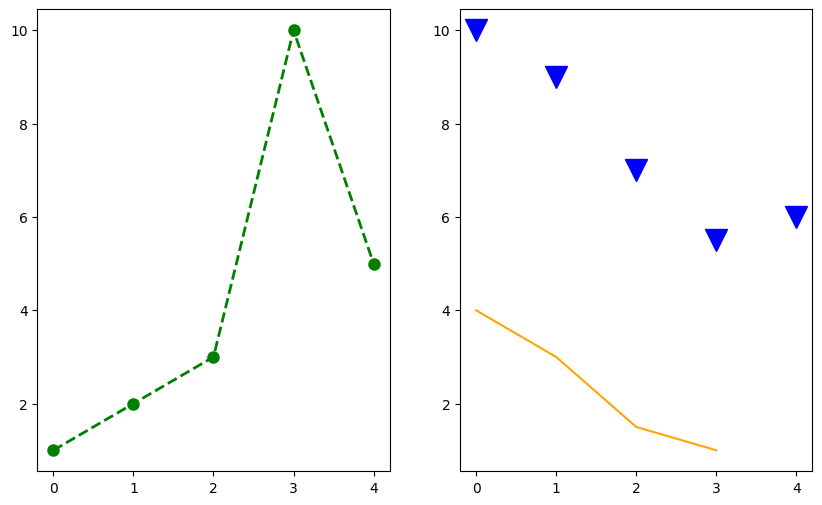

In [28]:
import matplotlib.pyplot as plt

y1 = [1,2,3,10,5]
y2 = [10,9,7,5.5,6]
y3 = [4,3,1.5,1]


# subplots returns a Figure and an Axes object
fig, ax = plt.subplots(nrows=1, ncols=2 , figsize = (10,6) ) # 2 columns and 1 row

# ax is a list with two objects. Each object correspond to 1 subplot

# accessing to the first column ax[0]
ax[0].plot( y1, color = 'green', marker = 'o', linestyle = '--', linewidth = 2, markersize = 8 )

# accessing to the second column ax[1]
ax[1].plot( y2, color = 'blue', marker = 'v', linestyle = '' , markersize = 16 )
ax[1].plot( y3, color = 'orange', marker = '', linestyle = '-' )

plt.savefig( 'testPlot.png' , dpi = 90  )


<br>


## 04. generating random numbers <a class="anchor" id="random"></a>


**the basics**

In [30]:
import numpy.random as rd

# random floats between 0 and 1
for i in range(4):
    print( rd.random() )


0.6893601510834116
0.5424072310338321
0.8213464207833964
0.6384230953202992


In [33]:
print( rd.random(size=10) ) # draw directly 10 numbers

[0.37454012 0.95071431 0.73199394 0.59865848 0.15601864 0.15599452
 0.05808361 0.86617615 0.60111501 0.70807258]


**setting the seed : pseudorandomness and reproducibility**

In [34]:
rd.seed(42) # setting the seed to 42
print( '1st draw' , rd.random(size=5) )
print( '2nd draw' , rd.random(size=5) )
rd.seed(42)


1st draw [0.37454012 0.95071431 0.73199394 0.59865848 0.15601864]
2nd draw [0.15599452 0.05808361 0.86617615 0.60111501 0.70807258]


In [39]:
print( 'after resetting seed' , rd.random(size=5) )

after resetting seed [0.61185289 0.13949386 0.29214465 0.36636184 0.45606998]


**beyond the uniform distribution**

numpy offers you quite a large [set of distributions you can draw from](https://docs.scipy.org/doc/numpy-1.15.0/reference/routines.random.html#distributions).

Let's look at the normal distribution:

In [40]:

normalDraw = rd.normal(size = 1000 )

print( 'mean ' , np.mean( normalDraw ) )
print( 'stdev' , np.std( normalDraw ) )

mean  0.03490612911207584
stdev 0.9980285798207245


In [42]:
normalDraw2 = rd.normal( loc = -2 , scale = 3 , size = 300 ) # loc changes the location (mean), and scale changes the standard deviation

print( 'mean ' , np.mean( normalDraw2 ) )
print( 'stdev' , np.std( normalDraw2 ) )

mean  -2.0536110953581663
stdev 2.919760087920322


of course, we could want to plot these drawn numbers:

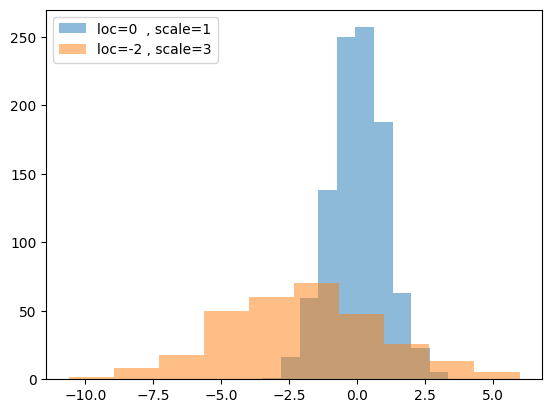

In [43]:
plt.hist( normalDraw  , alpha = 0.5 , label='loc=0  , scale=1')
plt.hist( normalDraw2 , alpha = 0.5 , label='loc=-2 , scale=3')
plt.legend()
plt.show()

## 05. statistical testing <a class="anchor" id="stats"></a>

`numpy.random` let's you draw random numbers ;
`scipy.stats` implements the probability density functions, and Percent point function, as well as the most statistical tests.


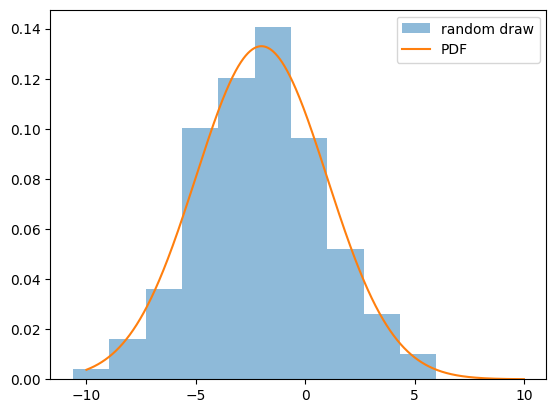

In [44]:
import scipy.stats as stats

# plotting the probability density function for 1 of the random draw we just made:

x = np.linspace(-10,10,1001)

normPDF = stats.norm.pdf( x , loc = -2 , scale = 3 )

plt.hist( normalDraw2 , alpha = 0.5 , label='random draw' , density = True) # don't forget density=True
plt.plot(x,normPDF , label='PDF' )
plt.legend()
plt.show()

We can also get the expected quantiles of a distribution:

In [45]:
print( '95% quantile of a Chi-square distribution with 3 degrees of freedom:', stats.chi2.ppf(0.95 , df=3))
print( 'fraction of a Chi-square distribution with 3 degrees of freedom above of equal to 5' ,  
      1 - stats.chi2.cdf( 5 , df=3 ) )

95% quantile of a Chi-square distribution with 3 degrees of freedom: 7.814727903251179
fraction of a Chi-square distribution with 3 degrees of freedom above of equal to 5 0.17179714429673354


And you can apply some classical statistical tests:

In [46]:
# t-test of independance between two random samples:
rd.seed(73)

s1 = rd.normal( size=67 )
s2 = rd.normal( size=54 , loc = 0.2)

testStat , pval = stats.ttest_ind(s1,s2 , equal_var=True)  # equal variance : Student's t-test ; unequal : Welch's
#almost all of these stat functions return the same test-statistic , pvalue tuple

print('result of the t-test')
print('\tt:',testStat)
print('\tp-value:',pval)

result of the t-test
	t: 0.26673986193074073
	p-value: 0.7901311339594405


**What is our conclusion for these tests results? What do you think about this?**

In [47]:

# Kolmogorov-smirnov test for a chi-square distribution

sample = rd.chisquare(df=13 , size = 43)


# kstest expect as second argument the cdf function of the reference distribution
# this is how to handle the fact that me must set an argument (degree of freedom)
refDistribution = stats.chi2(df=13).cdf

testStat , pval = stats.kstest( sample , refDistribution )
# alternative : 
# testStat , pval = stats.kstest( sample , lambda x : stats.chi2.cdf(x , df=13 ) )

print('result of the Kolmogorov-Smirnov test comparing our sample to a Chi-square distribution with 13 degrees of freedom')
print('\tK:',testStat)
print('\tp-value:',pval)


result of the Kolmogorov-Smirnov test comparing our sample to a Chi-square distribution with 13 degrees of freedom
	K: 0.12249766392962913
	p-value: 0.5003109000967569


If you are interested, this [webpage](https://machinelearningmastery.com/statistical-hypothesis-tests-in-python-cheat-sheet/) references all implemented tests, with examples.

## 06. bringing together numpy, numpy.random, and matplotlib <a class="anchor" id="together"></a>

The random generation function return a numpy array, meaning it is fairly trivial to combine it with other arrays:


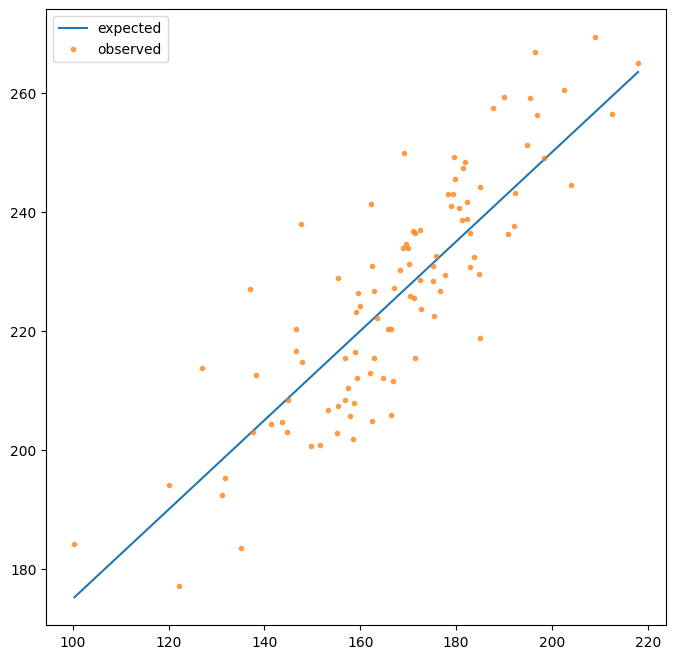

In [48]:
# combining 

x = np.sort( rd.normal(loc=170 , scale = 23 , size = 100) )

y_theoretical = 0.75 * x + 100 # simple linear relationship : y = a * x + b

measurement_noise = rd.normal(scale = 10 , size = 100) # some noise associated to the measure

y_observed = y_theoretical + measurement_noise # observed = expected + noise

fig,ax = plt.subplots(figsize=(8,8))
plt.plot( x , y_theoretical , label = 'expected' )
plt.plot( x , y_observed , marker = '.' , linestyle='' , alpha = 0.7 , label = 'observed')
plt.legend()
plt.show()

## 07. the briefest intro to pandas <a class="anchor" id="pandas"></a>

`pandas` is a powerful library when doing data analysis, especially in the forms of table.

Basically, it reimplements R data.frame as a DataFrame object and ties together neatly with the libraries we've just seen.


In [49]:
import pandas as pd

df = pd.read_table( '../data/beetle.csv' , sep=',' , index_col=0 ) # pandas automatically detects header.

df.head()

,dose,nexp,ndied,prop,nalive
1,49.1,59,6,0.102,53
2,53.0,60,13,0.217,47
3,56.9,62,18,0.290,44
4,60.8,56,28,0.500,28
5,64.8,63,52,0.825,11


In [50]:
Nrows, Ncols = df.shape
print( 'number of rows:',Nrows, 'number of columns:', Ncols )
print( 'column names' , df.columns )

number of rows: 8 number of columns: 5
column names Index(['dose', 'nexp', 'ndied', 'prop', 'nalive'], dtype='object')


In [51]:
df.describe()

,dose,nexp,ndied,prop,nalive
count,8.000000,8.000000,8.000000,8.000000,8.000000
mean,62.800000,60.125000,36.375000,0.602000,23.750000
std,9.599702,2.232071,22.557466,0.367937,21.985385
min,49.100000,56.000000,6.000000,0.102000,0.000000
25%,55.925000,59.000000,16.750000,0.271750,4.750000
50%,62.800000,60.000000,40.000000,0.662500,19.500000
75%,69.675000,62.000000,54.750000,0.919500,44.750000
max,76.500000,63.000000,61.000000,1.000000,53.000000


In [52]:
# select a single column:
df['dose']

1    49.1
2    53.0
3    56.9
4    60.8
5    64.8
6    68.7
7    72.6
8    76.5
Name: dose, dtype: float64

In [53]:
df[ ['ndied','nalive'] ] # select several columns

,ndied,nalive
1,6,53
2,13,47
3,18,44
4,28,28
5,52,11
6,53,6
7,61,1
8,60,0


**Plotting DataFrame Columns**

Because `DataFrame` columns are iterable, they can seamlessly be given as argument to `plot()`.

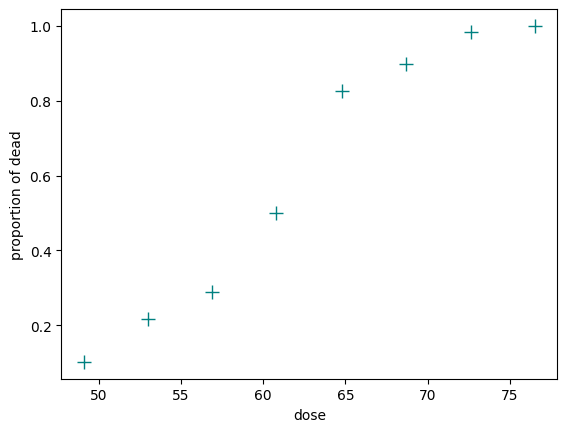

In [54]:

# plotting the column dose along the x-axis and prop along the y-axis
# I use the + marker, with a teal color.
plt.plot(df['dose'] , df['prop'] , color = 'teal' , linestyle='' , marker = '+' , markersize=10 )
plt.xlabel( 'dose' )
plt.ylabel( 'proportion of dead' )
plt.show()

DataFrame column can be manipulated like numpy array:

/home/anand/.local/lib/python3.10/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


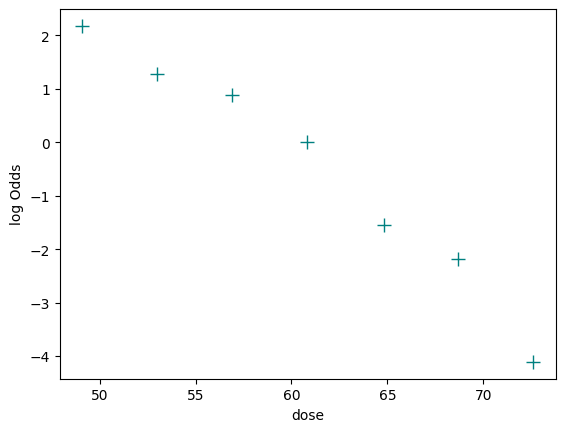

In [56]:

## we can combine columns using normal operators
Odds = df['nalive'] / df['ndied'] # the odds of being alive is nalive / ndead

## adding a new column to the DataFrame is trivial:
df['Odds'] = Odds 


## we can also apply numpy function to them
df['logOdds'] = np.log( df['Odds'] )


plt.plot(df['dose'] , df['logOdds'] , color = 'teal' , linestyle='' , marker = '+' , markersize=10 )
plt.xlabel( 'dose' )
plt.ylabel( 'log Odds' )
plt.show()
